### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.io.stata.read_stata('AP.dta')
df2 =pd.io.stata.read_stata('BIH.dta')
df3 =pd.io.stata.read_stata('CHATI.dta')
df4 =pd.io.stata.read_stata('HAR.dta')
df5 =pd.io.stata.read_stata('MP.dta')
df6 =pd.io.stata.read_stata('ODI.dta')
df7 =pd.io.stata.read_stata('PUN.dta')
df8 = pd.io.stata.read_stata('TN.dta')
df9 = pd.io.stata.read_stata('UP.dta')
df10 = pd.io.stata.read_stata('WB.dta')
df1.to_csv('AP.csv')
df2.to_csv("BIH.csv")
df3.to_csv("CHATI.csv")
df4.to_csv("HAR.csv")
df5.to_csv("MP.csv")
df6.to_csv("ODI.csv")
df7.to_csv("PUN.csv")
df8.to_csv("TN.csv")
df9.to_csv("UP.csv")
df10.to_csv("WB.csv")

In [3]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], axis =0)

### Making the dataframe

In [4]:
df.to_csv("rice plot all states.csv")

### Data cleaning

#### Missing values

In [5]:
### since there are so many columns checked it with a condition
nullseries = df.isnull().sum()
print(nullseries[nullseries > 0])

agroecology2     3375
agroecology3    15489
agroecology4    17085
agroecology5    18387
agroecology6    19425
dtype: int64


- drop the columns with more than 60% missing values of data

In [6]:
df.drop(["agroecology2","agroecology3","agroecology4","agroecology5","agroecology6"],axis = 1,inplace =True)

- changing datatypes and dropping redundant columns

In [7]:
df["farmer_id"]= df["farmer_id"].astype(str)

In [8]:
df.drop(df[(df.rfmm == "#N/A")].index,inplace =True)
df.drop(df[(df.rfmm == "tmaxc")].index,inplace =True)
df.drop(df[(df.rfmm == "tminc")].index,inplace =True)

In [9]:
df['rfmm'] = pd.to_numeric(df['rfmm'])
df['tmaxc'] = pd.to_numeric(df['tmaxc'])
df['tminc'] = pd.to_numeric(df['tminc'])

In [10]:
df["zoneno"] = df["zoneno"].astype(str)
df["tehsilno"] = df["tehsilno"].astype(str)
df["cultivatorno"]= df["cultivatorno"].astype(str)

In [11]:
print(df.year_1.unique())
print(df.year_2.unique())
print(df.year_3.unique())

[1.]
[2.]
[3.]


In [12]:
df.drop(["year_1","year_2","year_3"],axis =1,inplace =True)

In [13]:
df.drop(["id","zoneno","tehsilno","agroecology1","crop","cultivatorno"],inplace=True,axis=1)

In [14]:
df.drop(["time","yearpanel1","yearpanel2","yearpanel3"],axis =1,inplace =True)

In [15]:
df.set_index("farmer_id",inplace=True)

### Analysis

### Farmers in state

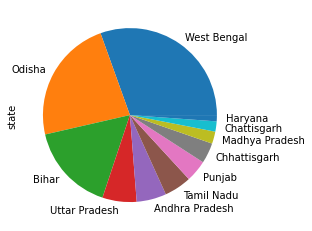

In [16]:
df["state"].value_counts().plot(kind='pie');

- **There are more farmers from:**
1. West bengal
2. odisha
3. bihar
4. Uttar pradesh
5. Andhra pradesh

### statewise croparea 

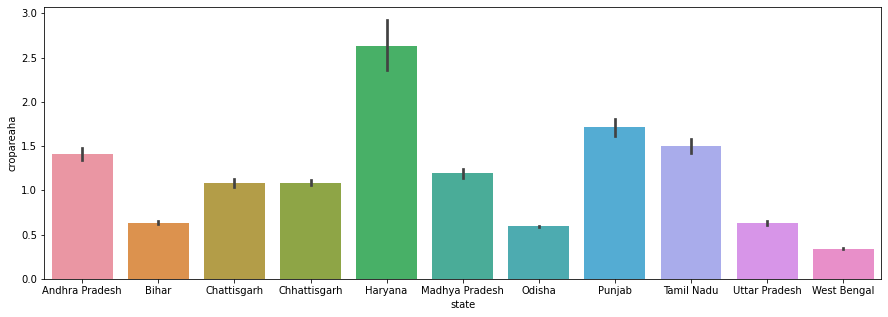

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(data =df,x=df.state,y =df.cropareaha)
plt.show()


- States with highest crop area
1. Haryana
2. Madhya pradesh & punjab
3. Andhra pradesh & Tamilnadu

### crop count districtwise

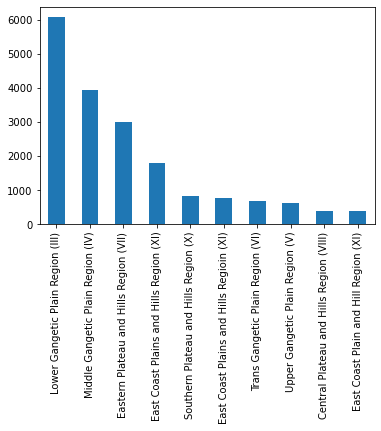

In [18]:
df["districtwiseregionorplateau"].value_counts()[:10].plot(kind='bar');

### statewise rainfall

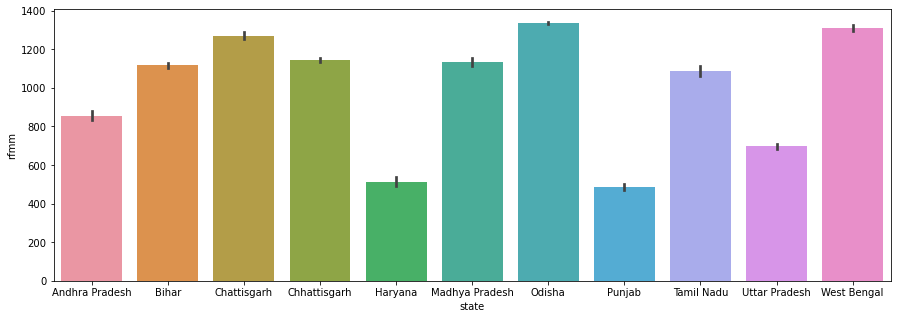

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(data =df,x=df.state,y =df.rfmm)
plt.show()

### relation between mainproductqtls, croparea in hectares

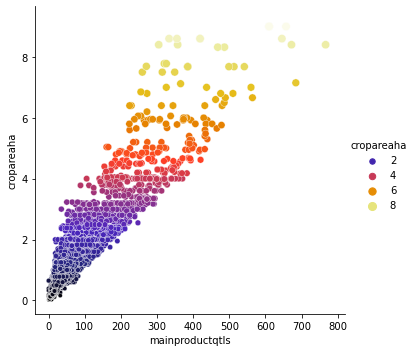

In [20]:
sns.relplot(data =df,x=df.mainproductqtls,y =df.cropareaha,hue =df.cropareaha,size =df.cropareaha,kind="scatter",palette="CMRmap");

### Year wise average yield in states

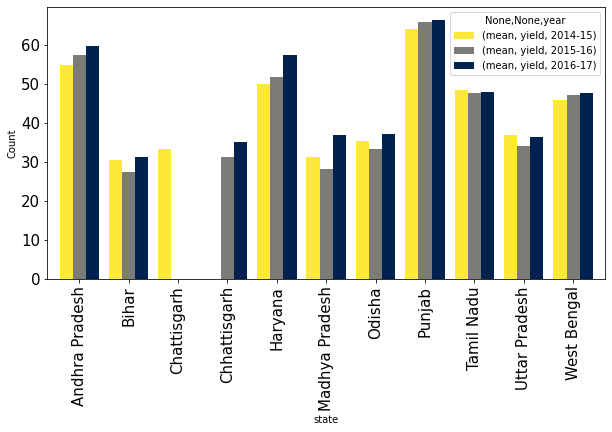

In [21]:
table2 = pd.pivot_table(df,index=['state'],columns = ["year"],values=["yield"],observed=True,aggfunc=["mean"])
ax = table2.plot(kind='bar',figsize=(10,5),fontsize=15,colormap="cividis_r",ylabel="Count",width=0.8);

### state wise mainproduct quanity in quintals

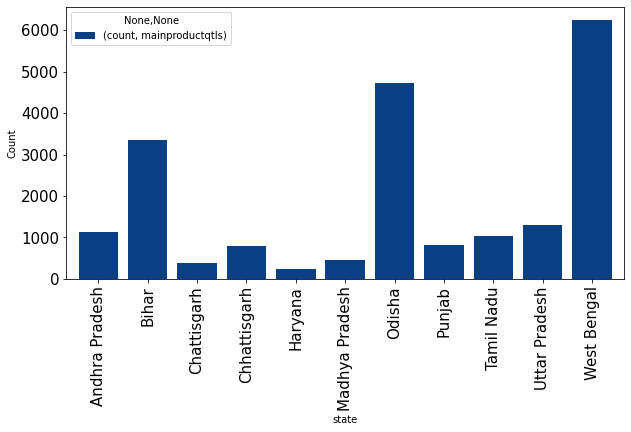

In [22]:
table2 = pd.pivot_table(df,index=['state'],values=["mainproductqtls"],observed=True,aggfunc=["count"])
ax = table2.plot(kind='bar',figsize=(10,5),fontsize=15,colormap="GnBu_r",ylabel="Count",width=0.8);

### Outlier detection

In [23]:
#setting  index
df.describe()

,rfmm,tmaxc,tminc,hamonthsingroundha,parcelplotseasonpps,mainproductqtls,cropareaha,mainproductrs,byproductrs,familylabourhrs,...,seedqtyperha,nitrogen,phosphorous,potash,otherfert,fertilizer,manure,manurevalue,insecticide,irrigation
count,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,2.049600e+04,20496.000000,20496.000000,...,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000
mean,1155.584007,30.262583,19.551049,3.011669,2214.146175,31.894650,0.727355,4.312758e+04,3299.998175,176.450897,...,58.369446,75.359200,39.949909,25.315887,2.486103,143.116714,12.204575,892.218750,1025.722656,1948.377075
std,494.740646,7.350604,5.000208,4.131694,1466.407427,47.206684,0.773547,7.383457e+04,4310.659936,138.986786,...,93.599846,41.462498,24.578714,28.142658,16.189257,74.012383,28.291792,1687.119019,1586.172363,3428.309570
min,0.000000,0.000000,0.000000,0.060000,1011.000000,0.000000,0.020000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,939.700000,31.500000,19.500000,1.200000,1011.000000,11.400000,0.300000,1.313025e+04,1035.000000,82.669249,...,42.307693,45.499999,24.150000,0.000000,0.000000,88.678028,0.000000,0.000000,0.000000,0.000000
50%,1191.400024,32.000000,20.500000,2.000000,2011.000000,18.250000,0.500000,2.178000e+04,2250.000000,140.000000,...,59.259258,66.532391,36.000000,19.500000,0.000000,132.000000,0.000000,0.000000,357.142883,250.000000
75%,1434.400024,32.500000,21.799999,3.920000,3011.000000,33.000000,0.800000,4.080000e+04,4100.000000,229.000000,...,78.333328,97.333328,53.666668,39.000000,0.000000,184.000000,17.500000,1500.000000,1481.481445,2714.438660
max,3795.399902,34.700001,25.200001,320.000000,14011.000000,782.000000,9.200000,1.334515e+06,126000.000000,1541.000000,...,9075.630859,540.000000,287.500000,300.000000,769.230774,953.076965,750.000000,35714.285156,22500.000000,53660.000000


- Outliers are present since( there are values (from min and max) <25 & >75)

### Detection with Z-score

In [24]:
df_num = df.select_dtypes("number")

from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {i} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"outliers {(~good).sum()} points")
    return good

In [25]:
for i in df_num.columns:
    z_score(df_num[i], threshold=3).sum()
    

z-score of rfmm corresponds to a prob of 0.27%
outliers 177 points
z-score of tmaxc corresponds to a prob of 0.27%
outliers 1116 points
z-score of tminc corresponds to a prob of 0.27%
outliers 1116 points
z-score of hamonthsingroundha corresponds to a prob of 0.27%
outliers 242 points
z-score of parcelplotseasonpps corresponds to a prob of 0.27%
outliers 321 points
z-score of mainproductqtls corresponds to a prob of 0.27%
outliers 473 points
z-score of cropareaha corresponds to a prob of 0.27%
outliers 425 points
z-score of mainproductrs corresponds to a prob of 0.27%
outliers 474 points
z-score of byproductrs corresponds to a prob of 0.27%
outliers 291 points
z-score of familylabourhrs corresponds to a prob of 0.27%
outliers 356 points
z-score of familylabourrs corresponds to a prob of 0.27%
outliers 386 points
z-score of attachedlabourhrs corresponds to a prob of 0.27%
outliers 372 points
z-score of attachedlabourrs corresponds to a prob of 0.27%
outliers 321 points
z-score of casual

### outlier treatment with quantile based capping

In [26]:
for i in df_num.columns:
    lower_limit = df[i].quantile(0.10)
    upper_limit = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower_limit, lower_limit,df[i])
    df[i] = np.where(df[i] >upper_limit, upper_limit,df[i])
    if np.abs(df[i].skew()) > 1:
        print(i,":",df[i].skew())
        

tmaxc : -1.0505267383545536
mainproductqtls : 1.0641712
mainproductrs : 1.1981731451375395
hiredanimallabourhrs : 1.8803751
hiredanimallabourrs : 1.8866954
ownedanimallabourhrs : 1.8536605
ownedanimallabourrs : 1.6380069
hiredmachiners : 1.036619011654168
ownmachinehrs : 1.9366897
ownmachiners : 2.2725704
seedvaluers : 1.2684853639801639
fertilisernkg : 1.1932062
fertilisernrs : 1.0820202
fertiliserpkg : 1.1072968
fertiliserprs : 1.0608301
otherfertiliserkg : 2.5775387
otherfertiliserrs : 2.5500462
totalfertiliserkg : 1.1397098
totalfertiliserrs : 1.063160455084411
manureqtl : 1.229756
manurers : 1.2831838
insecticidesrs : 1.4229004140011063
ownirrigationmachinehrs : 1.9131573
ownirrigationmachiners : 1.710669
hiredirrigationmachinehrs : 2.3773894
hiredirrigationmachiners : 2.3667731
canalandotherirrigationchargesrs : 1.9887059
landrevenuers : 1.0422193
imputedrentrs : 1.1549542
totalcapitalrs : 1.5512595680777879
samplenoofgrowersinsizegroup : 1.0144259796962125
totalnumberofgrowersin

In [27]:
df.describe()

,rfmm,tmaxc,tminc,hamonthsingroundha,parcelplotseasonpps,mainproductqtls,cropareaha,mainproductrs,byproductrs,familylabourhrs,...,seedqtyperha,nitrogen,phosphorous,potash,otherfert,fertilizer,manure,manurevalue,insecticide,irrigation
count,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,...,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000,20496.000000
mean,1163.456286,31.843521,20.419087,2.624788,2069.200625,24.727827,0.635916,31495.341970,2781.743082,164.602219,...,56.166519,73.487175,38.995533,23.063786,0.345760,139.792282,7.969368,688.721252,842.655457,1514.685547
std,349.239059,1.038862,1.571233,1.693579,1105.141549,17.719790,0.416050,25092.487578,2147.247233,98.358963,...,28.264278,32.914665,17.717505,22.682924,1.008885,57.643894,11.560222,1013.117371,1044.489136,1992.090088
min,540.299988,29.500000,17.400000,0.760000,1011.000000,6.750000,0.200000,7782.000000,175.000000,46.500000,...,0.000000,32.370369,14.334660,0.000000,0.000000,65.314796,0.000000,0.000000,0.000000,0.000000
25%,939.700000,31.500000,19.500000,1.200000,1011.000000,11.400000,0.300000,13130.250000,1035.000000,82.669249,...,42.307693,45.499999,24.150000,0.000000,0.000000,88.678028,0.000000,0.000000,0.000000,0.000000
50%,1191.400024,32.000000,20.500000,2.000000,2011.000000,18.250000,0.500000,21780.000000,2250.000000,140.000000,...,59.259258,66.532391,36.000000,19.500000,0.000000,132.000000,0.000000,0.000000,357.142883,250.000000
75%,1434.400024,32.500000,21.799999,3.920000,3011.000000,33.000000,0.800000,40800.000000,4100.000000,229.000000,...,78.333328,97.333328,53.666668,39.000000,0.000000,184.000000,17.500000,1500.000000,1481.481445,2714.438660
max,1653.099976,33.200001,22.500000,6.000000,4011.000000,63.000000,1.500000,87442.500000,7000.000000,353.000000,...,92.500000,133.846161,70.000000,64.795837,3.344298,241.250000,30.769232,2704.166748,3000.000000,5600.000000


### Target variable after removing outliers

<AxesSubplot:xlabel='mainproductqtls', ylabel='Count'>

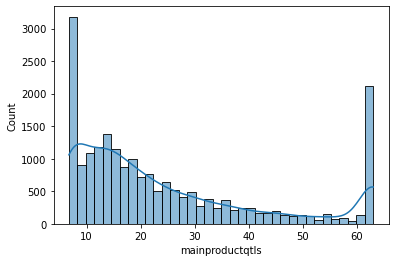

In [28]:
sns.histplot(df.mainproductqtls,kde=True)

<AxesSubplot:xlabel='mainproductqtls'>

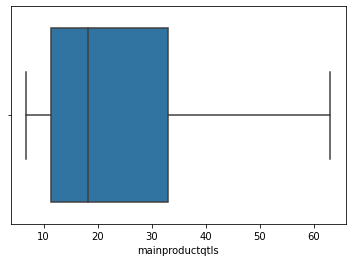

In [29]:
sns.boxplot(df.mainproductqtls)

### Numerical independent variables after capping

In [30]:
len(df_num.columns)


87

In [31]:
df_num = df.select_dtypes("number")

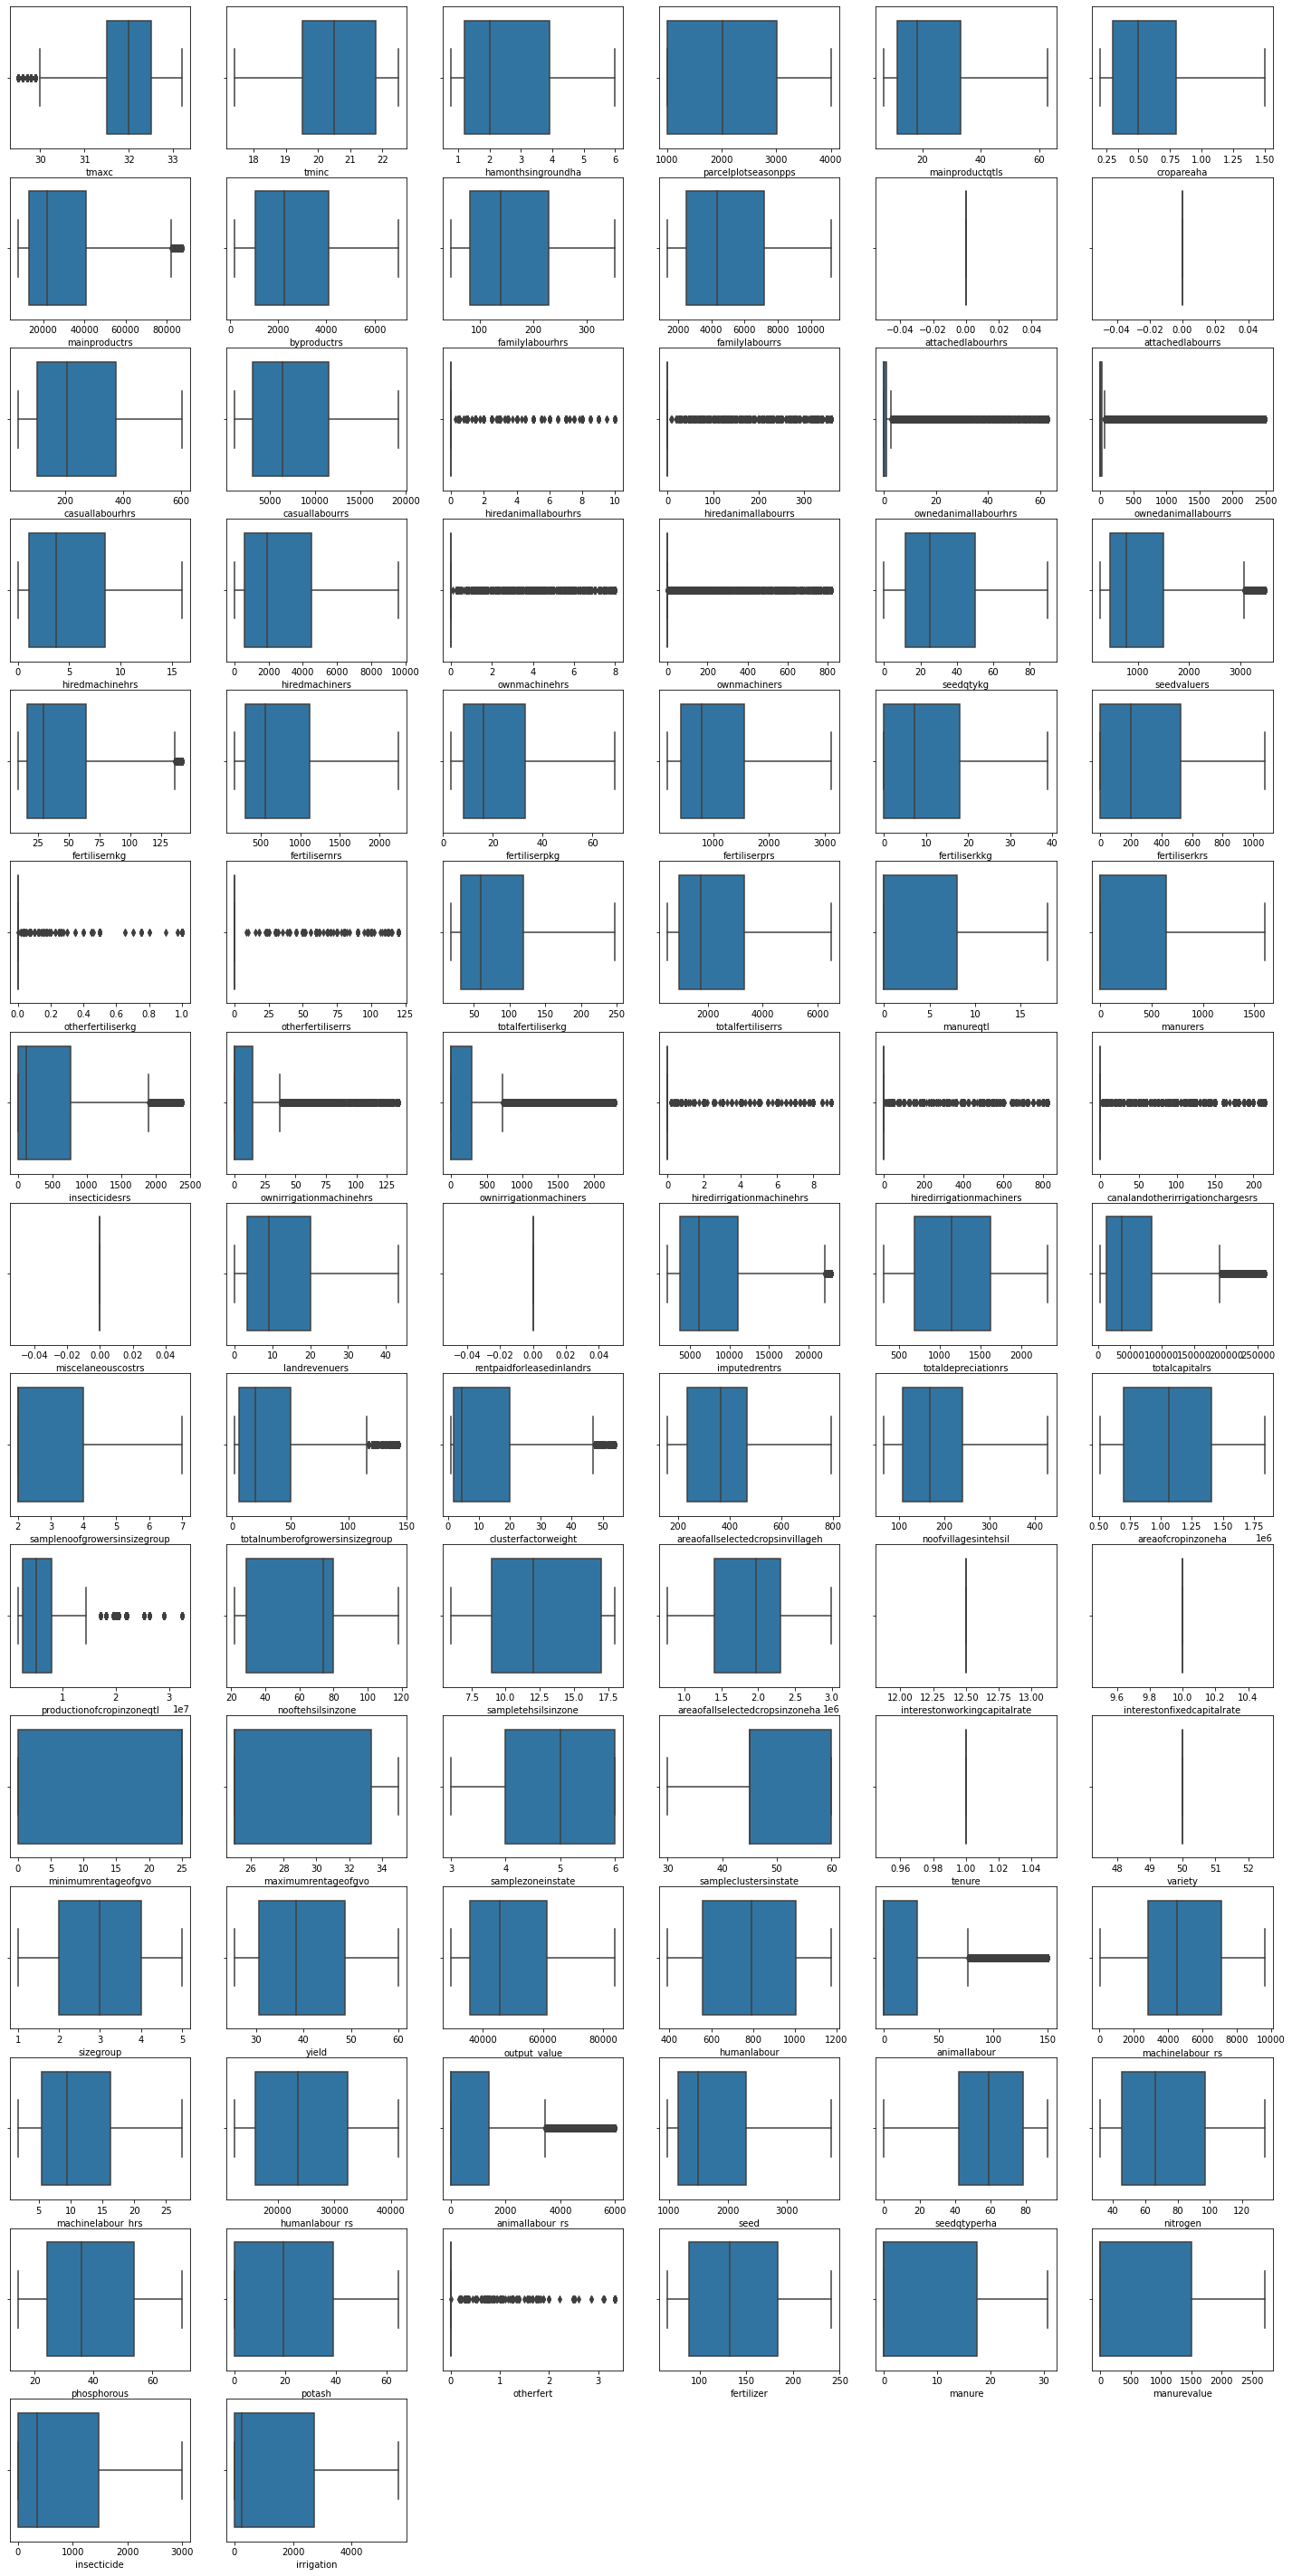

In [32]:
plt.figure(figsize=(25,55))
for i,j in enumerate(df_num.columns[1:92]):
    plt.subplot(16,6,i+1)
    sns.boxplot(x=df_num[j])

In [33]:
### dropping the columns where entire data is converged at one value
df.drop(["attachedlabourhrs","attachedlabourrs","miscelaneouscostrs","rentpaidforleasedinlandrs","interestonfixedcapitalrate","interestonworkingcapitalrate","tenure","variety"],axis = 1,inplace =True)

### Checking the correlation

In [34]:
corr = df.corr() 
corr1 =corr[corr>= np.abs(0.20)]

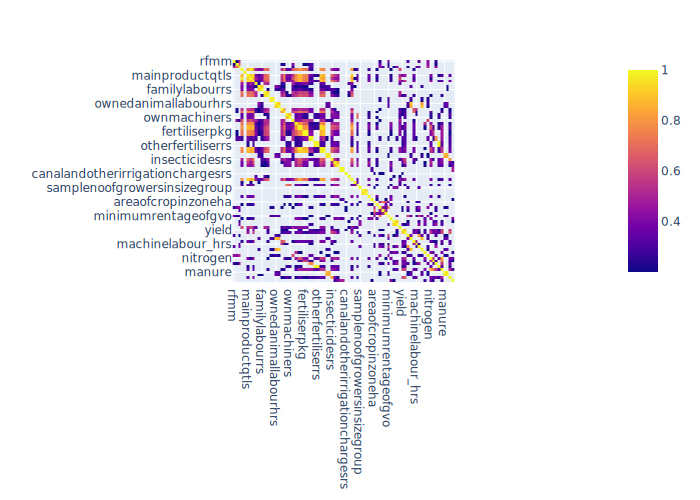

In [35]:
fig = px.imshow(corr1,aspect ='equal') 
fig.show()

### Checking the non correlated features (threshold >0.20) with target variable

In [36]:
corr_matrix = df.corr().abs()
thres = corr_matrix[corr_matrix > 0.20]
print(thres['mainproductqtls'][1:61])

tmaxc                                    NaN
tminc                                    NaN
hamonthsingroundha                  0.870053
parcelplotseasonpps                 0.236273
mainproductqtls                     1.000000
cropareaha                          0.911246
mainproductrs                       0.973470
byproductrs                         0.414645
familylabourhrs                     0.313778
familylabourrs                      0.403797
casuallabourhrs                     0.669677
casuallabourrs                      0.731480
hiredanimallabourhrs                     NaN
hiredanimallabourrs                      NaN
ownedanimallabourhrs                     NaN
ownedanimallabourrs                      NaN
hiredmachinehrs                     0.580445
hiredmachiners                      0.758404
ownmachinehrs                       0.411916
ownmachiners                        0.400277
seedqtykg                           0.548448
seedvaluers                         0.768483
fertiliser

In [37]:
corr_matrix = df.corr().abs()
thres = corr_matrix[corr_matrix > 0.20]
print(thres['mainproductqtls'][60:])

yield                0.372923
output_value         0.462628
humanlabour          0.490157
animallabour         0.243088
machinelabour_rs     0.370681
machinelabour_hrs         NaN
humanlabour_rs       0.331948
animallabour_rs      0.241398
seed                      NaN
seedqtyperha              NaN
nitrogen             0.393872
phosphorous               NaN
potash                    NaN
otherfert            0.233741
fertilizer           0.318638
manure                    NaN
manurevalue               NaN
insecticide          0.328723
irrigation                NaN
Name: mainproductqtls, dtype: float64


- ### drop the less correlated features

In [38]:
df.drop(["tmaxc","tminc","hiredanimallabourhrs","hiredanimallabourrs","ownedanimallabourhrs","ownedanimallabourrs","manureqtl","manurers","hiredirrigationmachinehrs"],axis =1,inplace =True)

In [39]:
df.drop(["hiredirrigationmachiners","canalandotherirrigationchargesrs","landrevenuers","totaldepreciationrs","clusterfactorweight","areaofcropinzoneha","nooftehsilsinzone","sampletehsilsinzone","areaofallselectedcropsinzoneha",
"machinelabour_hrs","seed","seedqtyperha","phosphorous","potash","manure","manurevalue","irrigation"],axis = 1,inplace =True)

### Train test split

In [40]:
X = df.drop('mainproductqtls',axis = 1)
y = df['mainproductqtls']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [42]:
X_train_num = X_train.select_dtypes("number")
X_train_cat = X_train.select_dtypes("object")
X_test_num = X_test.select_dtypes("number")
X_test_cat = X_test.select_dtypes("object")

In [43]:
### Normalization of numerical features

In [44]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()


X_train_num= pd.DataFrame(ms.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)
X_test_num= pd.DataFrame(ms.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

### creating dummies for categorical

In [45]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = "first",sparse= False)



X_train_cat = pd.DataFrame(encoder.fit_transform(X_train_cat),

                              columns=encoder.get_feature_names(X_train_cat.columns),

                              index = X_train_cat.index)

X_test_cat = pd.DataFrame(encoder.transform(X_test_cat),

                              columns=encoder.get_feature_names(X_test_cat.columns),

                              index = X_test_cat.index)

X_train_transformed = pd.concat([X_train_cat,X_train_num],axis =1)

X_test_transformed = pd.concat([X_test_cat,X_test_num],axis = 1)

### Dimensionality Reduction

### Variance Inflation Factor (Check for multicollinearity)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_num.values, i)
                          for i in range(len(X_train_num.columns))]
vif_data

,feature,VIF
0,rfmm,6.351040
1,hamonthsingroundha,49.216307
2,parcelplotseasonpps,2.507176
3,cropareaha,100.570162
4,mainproductrs,52.414679
5,byproductrs,5.499111
6,familylabourhrs,42.448192
7,familylabourrs,42.981755
8,casuallabourhrs,51.789904
9,casuallabourrs,52.471451


- Observe the features with very high VIF
- Checking for any interaction between variables

In [47]:
high_vif = vif_data[(vif_data["VIF"] > 10) & (vif_data["VIF"] < 90)]
high_vif

,feature,VIF
1,hamonthsingroundha,49.216307
4,mainproductrs,52.414679
6,familylabourhrs,42.448192
7,familylabourrs,42.981755
8,casuallabourhrs,51.789904
9,casuallabourrs,52.471451
11,hiredmachiners,20.344912
23,otherfertiliserrs,31.906945
26,insecticidesrs,12.830125
29,imputedrentrs,16.736439


In [48]:
X_corr = X_train_transformed.corr()

In [49]:
X_corr["samplezoneinstate"].describe()

count    299.000000
mean      -0.013044
std        0.153065
min       -0.519580
25%       -0.084887
50%        0.000473
75%        0.041622
max        1.000000
Name: samplezoneinstate, dtype: float64

### checking the highly correlated  
- mainproductrs 	52.414679
- 6 	familylabourhrs 	42.448192
- 7 	familylabourrs 	42.981755
- 8 	casuallabourhrs 	51.789904
- 9 	casuallabourrs 	52.471451
- 11 	hiredmachiners 	20.344912
- 23 	otherfertiliserrs 	31.906945
- 26 	insecticidesrs 	12.830125
- 29 	imputedrentrs 	16.736439
- 36 	minimumrentageofgvo 	43.773485
- 37 	maximumrentageofgvo 	17.640401
- 38 	samplezoneinstate 	74.987602
- 40 	sizegroup 	11.395794
- 41 	yield 	16.406748
- 42 	output_value 	24.213702
- 43 	humanlabour 	34.286842
- 45 	machinelabour_rs 	16.038650
- 46 	humanlabour_rs 	28.781207

<AxesSubplot:>

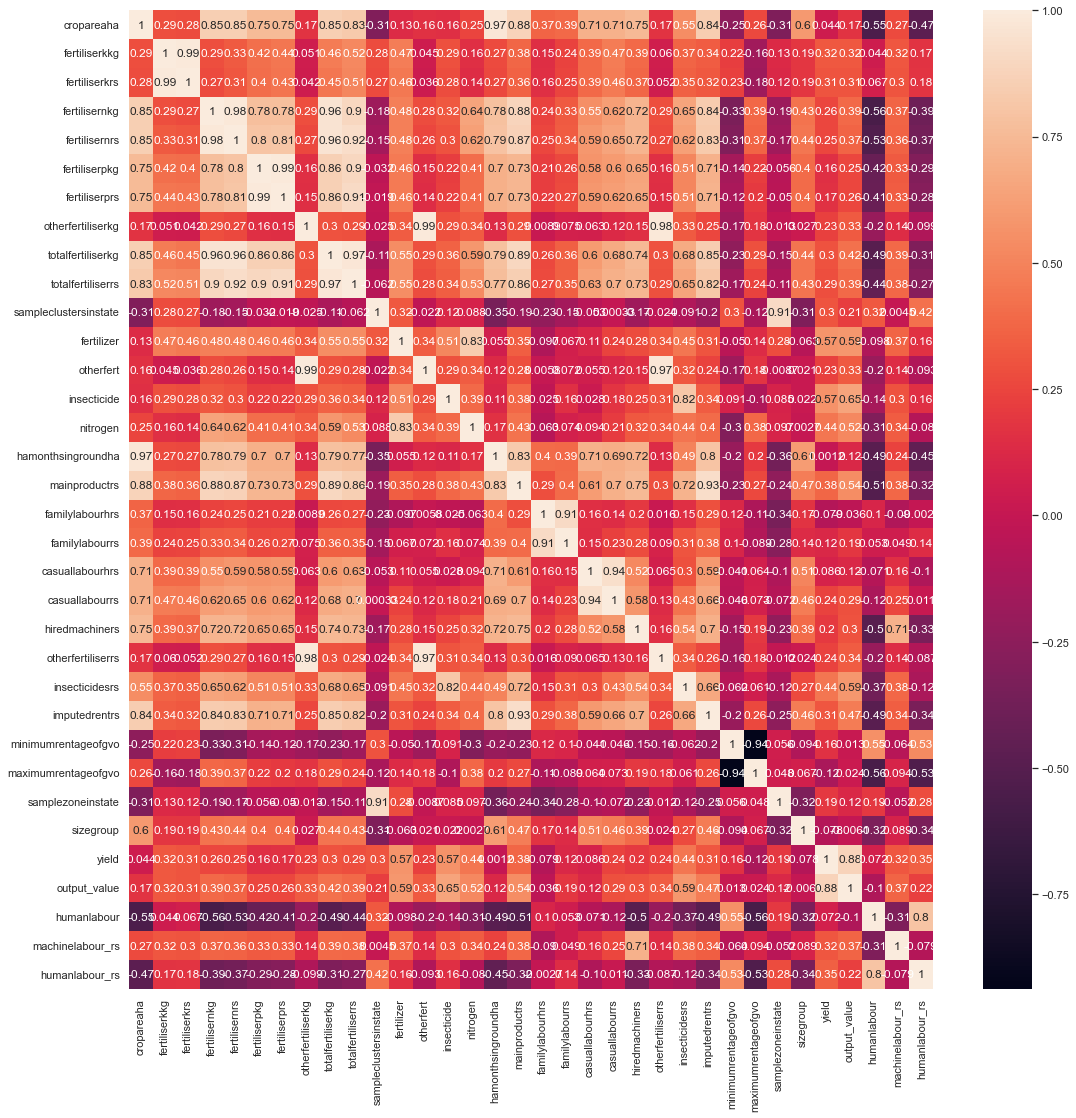

In [50]:
heat = X_train_transformed[["cropareaha","fertiliserkkg","fertiliserkrs","fertilisernkg","fertilisernrs","fertiliserpkg","fertiliserprs","otherfertiliserkg","totalfertiliserkg","totalfertiliserrs","sampleclustersinstate","fertilizer","otherfert","insecticide","nitrogen","hamonthsingroundha","mainproductrs","familylabourhrs","familylabourrs","casuallabourhrs","casuallabourrs","hiredmachiners","otherfertiliserrs","insecticidesrs","imputedrentrs","minimumrentageofgvo","maximumrentageofgvo","samplezoneinstate","sizegroup","yield","output_value","humanlabour","machinelabour_rs","humanlabour_rs"]]
sns.set(rc = {'figure.figsize':(18,18)})
sns.heatmap(heat.corr(),annot = True)


- checking the interaction between all the variables named "fertilizers"
- otherfert & otherfertilizerkg has -0.99 correlation so delete one of them
- df.sampleclustersinstate vs df.samplezoneinstate
- insecticide,insecticiders
- monthsin ground vs crop area
- familylabourhrs vs familylabourrs
- casuallabourhrs vs casuallabourrs

- dropping the rs variable where quantitiy is available since we are finding target in quintals

In [51]:
modified_fertkg = df["fertiliserkkg"] + df["fertilisernkg"] + df["fertiliserpkg"] + df["otherfertiliserkg"]
totalfertkg= df["totalfertiliserkg"]
modifiedfert_rs = df["fertiliserkrs"] + df["fertilisernrs"] + df["fertiliserprs"] + df["otherfertiliserrs"]
totalfertrs = df["totalfertiliserrs"]

In [52]:
fert_col=pd.DataFrame({"totalfertkg" : totalfertkg,"modifiedkg":modified_fertkg,"modifiedfert_rs":modifiedfert_rs,"totalfertrs":totalfertrs})

In [53]:
fert_col.corr()

,totalfertkg,modifiedkg,modifiedfert_rs,totalfertrs
totalfertkg,1.000000,0.981734,0.943172,0.974524
modifiedkg,0.981734,1.000000,0.974907,0.967787
modifiedfert_rs,0.943172,0.974907,1.000000,0.972477
totalfertrs,0.974524,0.967787,0.972477,1.000000


- all(n,p,k) kg & rs these are the same as totalfertrs,kg 
- and total fertkg,rs are very highly correlated with 0.90+,so fertrs is deleted

In [54]:
X_train_transformed.drop(["fertiliserkkg","fertiliserkrs","fertilisernkg","fertilisernrs","fertiliserpkg","fertiliserprs","otherfertiliserkg","totalfertiliserrs","mainproductrs","familylabourrs","casuallabourrs","hiredmachiners","insecticidesrs","humanlabour_rs"],axis=1,inplace=True)

In [55]:
X_test_transformed.drop(["fertiliserkkg","fertiliserkrs","fertilisernkg","fertilisernrs","fertiliserpkg","fertiliserprs","otherfertiliserkg","totalfertiliserrs","mainproductrs","familylabourrs","casuallabourrs","hiredmachiners","insecticidesrs","humanlabour_rs"],axis=1,inplace=True)

### Training the models

In [56]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [57]:
models = {
    'SVR':SVR(),
    "Lasso":Lasso(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    'ElasticNet':ElasticNet(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [58]:
#creating the lists for error metrics
model_rmse = []
model_r2 =[]
model_adjustedr2=[]
model_mse=[]
model_names = []
train_mse=[]
train_rmse=[]
train_r2=[]
train_r2adjusted=[]

# training the model with function
for name,model in models.items():
    a = model.fit(X_train_transformed,y_train)
# prediction on test set
    y_predicted = a.predict(X_test_transformed)
# prediction on train set
    y_predicted_train= a.predict(X_train_transformed)
# calculating error metrics
    score_train = np.sqrt(metrics.mean_squared_error(y_train, y_predicted_train))
    score = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
    mse_train = metrics.mean_squared_error(y_train,y_predicted_train) 
    mse = metrics.mean_squared_error(y_test,y_predicted)
    r2_train = r2_score(y_train,y_predicted_train)
    r2 = r2_score(y_test,y_predicted)
    adjusted_r2_train = 1 - (1-r2_score(y_train, y_predicted_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    adjusted_r2 = 1 - (1-r2_score(y_test, y_predicted)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    model_mse.append(mse)
    model_rmse.append(score)
    model_r2.append(r2)
    model_adjustedr2.append(adjusted_r2)
    model_names.append(name)
    train_mse.append(mse_train)
    train_rmse.append(score_train)
    train_r2.append(r2_train)
    train_r2adjusted.append(adjusted_r2_train)
    #creating dataframe
    df_results = pd.DataFrame([model_names,train_rmse,model_rmse,train_r2,model_r2,train_r2adjusted,model_adjustedr2,train_mse,model_mse])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE_train',2:"RMSE",3:"R_2_train",4:"R_2",5:"Adjusted R_2_train",6:"Adjusted R_2",7:"MSE_train",8:"MSE"}).sort_values(by='R_2',ascending=False)
    
df_results

,Model,RMSE_train,RMSE,R_2_train,R_2,Adjusted R_2_train,Adjusted R_2,MSE_train,MSE
7,RandomForestRegressor,0.465275,1.248189,0.999315,0.994964,0.999313,0.99495,0.216481,1.557976
2,XGBRegressor,0.577253,1.346632,0.998945,0.994138,0.998942,0.994122,0.333221,1.813418
4,DecisionTreeRegressor,0.0,1.981502,1.0,0.987309,1.0,0.987272,0.0,3.92635
0,SVR,2.902542,2.986894,0.973333,0.971163,0.973256,0.971079,8.424751,8.921534
3,Ridge,3.223242,3.333917,0.967115,0.964073,0.96702,0.963969,10.389289,11.115004
6,LinearRegression,3.222639,3.337717,0.967128,0.963991,0.967033,0.963887,10.385403,11.140353
1,Lasso,5.836331,5.846532,0.892183,0.889513,0.891871,0.889194,34.06276,34.18194
5,ElasticNet,9.25928,9.124849,0.728629,0.730868,0.727845,0.730091,85.734274,83.262872


In [59]:
### Observations

- low variance and bias between train and test score
- on an average **Random forest, XGBoost, Decision tree are the top 3 algorithms** with best performance on all error scores

<AxesSubplot:>

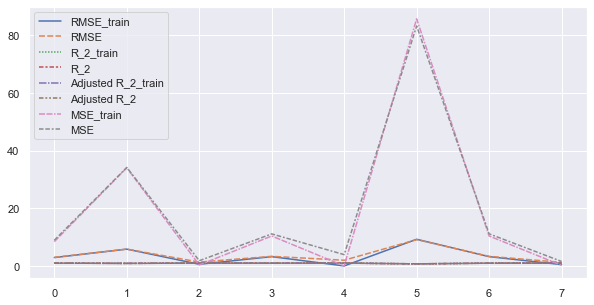

In [60]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.lineplot(data = df_results)